## ResNet-50 Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score, roc_auc_score, confusion_matrix
import os
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 A utilizar dispositivo: {device}")

# Define o caminho base corretamente
CURRENT_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(CURRENT_DIR) 
DATASET_ROOT = os.path.join(PROJECT_ROOT, "data", "odir5k")

if os.path.exists(DATASET_ROOT):
    print(f"✅ Sucesso: Dados encontrados em: {DATASET_ROOT}")
else:
    print(f"❌ Erro: Pasta {DATASET_ROOT} não encontrada!")

🚀 A utilizar dispositivo: cpu
✅ Sucesso: Dados encontrados em: /home/carolina-silva/UA/MEI/1ºANO/1SEMESTRE/FAA/Projetos/projects_faa/project2/odir-project/data/odir5k


Caminho do Notebook: /home/carolina-silva/UA/MEI/1ºANO/1SEMESTRE/FAA/Projetos/projects_faa/project2/odir-project/notebooks
Raiz do Projeto: /home/carolina-silva/UA/MEI/1ºANO/1SEMESTRE/FAA/Projetos/projects_faa/project2/odir-project
Caminho do Dataset: /home/carolina-silva/UA/MEI/1ºANO/1SEMESTRE/FAA/Projetos/projects_faa/project2/odir-project/data/odir5k
✅ Sucesso: Pasta de dados encontrada!
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images


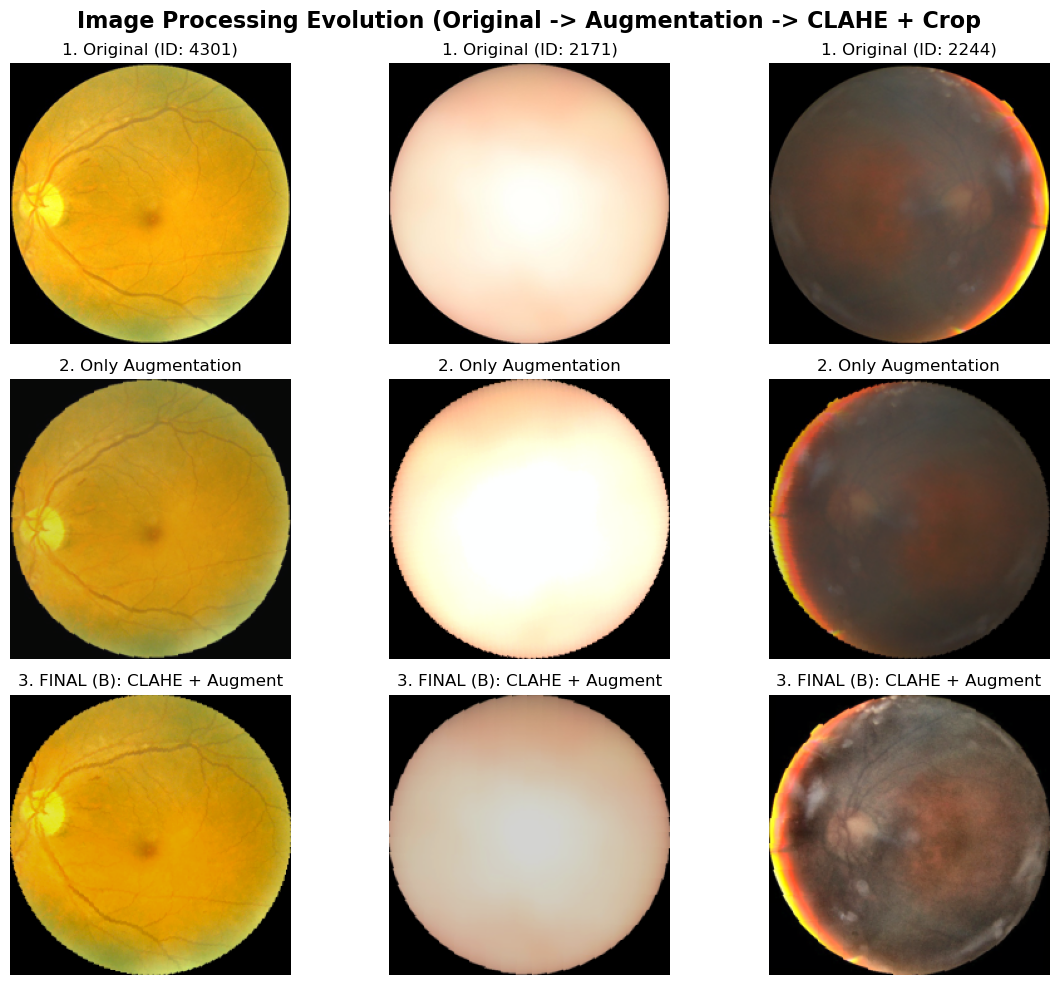

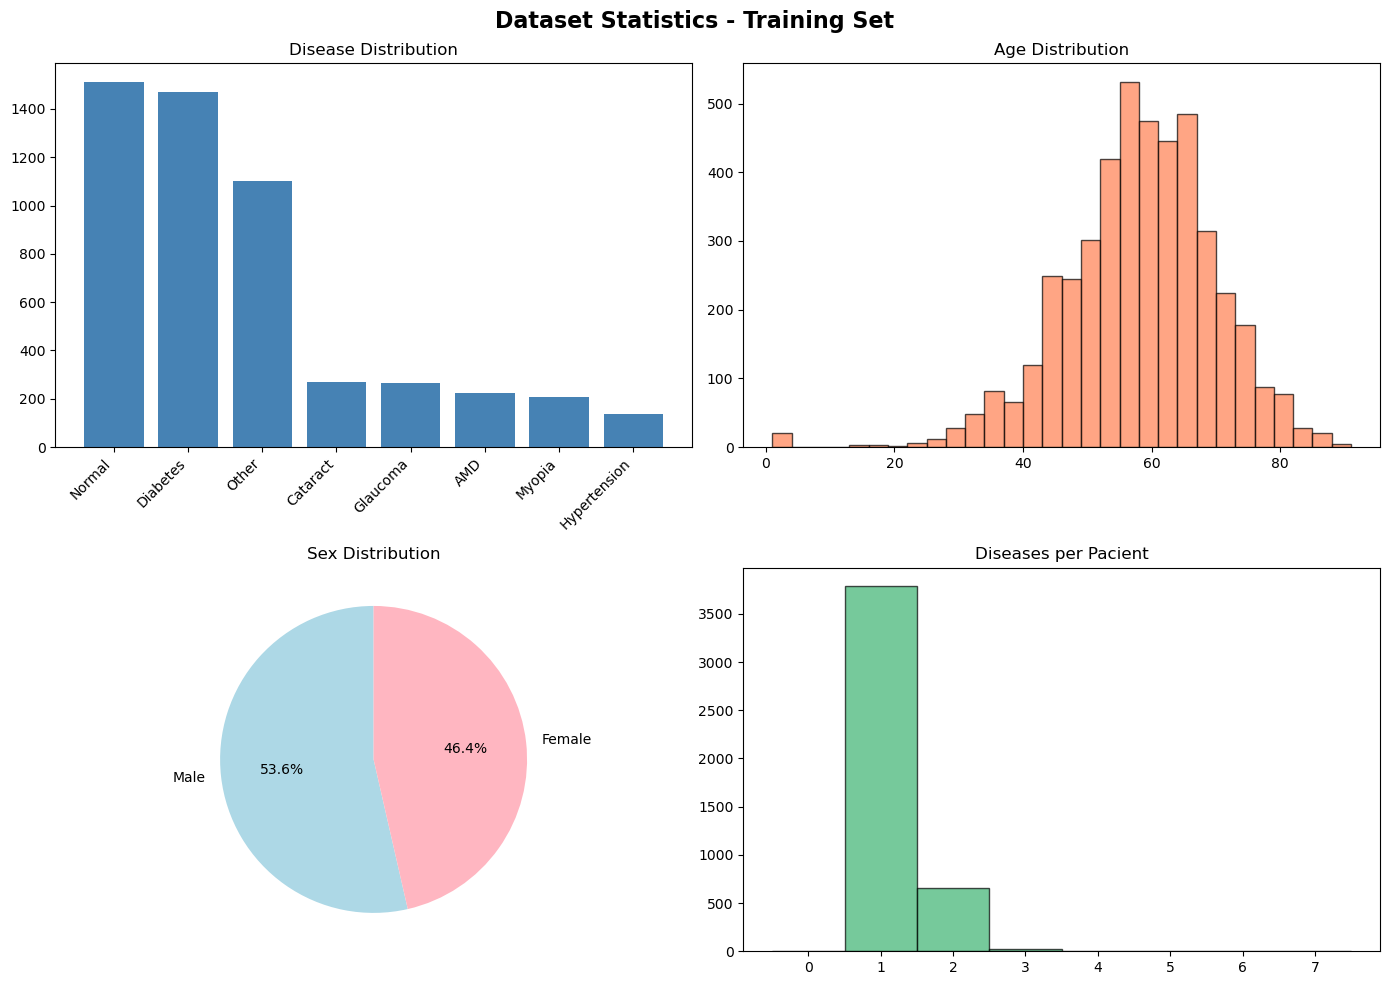

  Estatísticas guardadas em: results/dataset_statistics.png

 Resume: Train: 4474 | Val: 959 | Test: 959

COMPREHENSIVE EDA & PREPROCESSING ANALYSIS

DATASET SUMMARY - ODIR-5K
     Split  Patients  Images Percentage
  Training      2978    4474      70.0%
Validation       897     959      15.0%
      Test       891     959      15.0%
     Total      4766    6392       100%


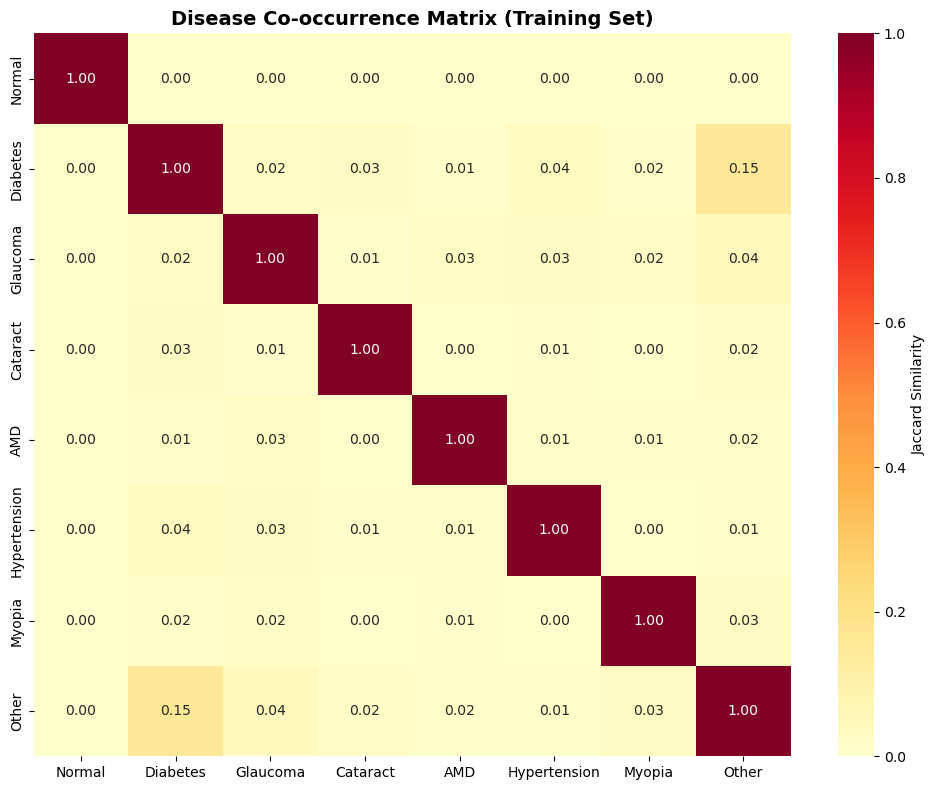


🔍 Most Common Disease Pairs:
  Diabetes + Other: 338 cases
  Diabetes + Hypertension: 59 cases
  Glaucoma + Other: 54 cases
  Diabetes + Cataract: 52 cases
  Diabetes + Glaucoma: 42 cases
  Myopia + Other: 36 cases
  Cataract + Other: 31 cases
  Diabetes + Myopia: 25 cases
  AMD + Other: 20 cases
  Diabetes + AMD: 19 cases

 Multi-label Statistics:
  Images with 0 diseases: 0 (0.0%)
  Images with 1 disease: 3791 (84.7%)
  Images with 2+ diseases: 683 (15.3%)
  Max diseases per image: 3
  Mean diseases per image: 1.16

📈 Per-Disease Statistics:
  Normal         : 1513 ( 33.8%)
  Diabetes       : 1470 ( 32.9%)
  Glaucoma       :  264 (  5.9%)
  Cataract       :  271 (  6.1%)
  AMD            :  223 (  5.0%)
  Hypertension   :  136 (  3.0%)
  Myopia         :  207 (  4.6%)
  Other          : 1100 ( 24.6%)
  📂 train: 4474 pacients, 5732 images

 Analyzing image quality (500 samples)...


100%|██████████| 500/500 [00:10<00:00, 47.67it/s]


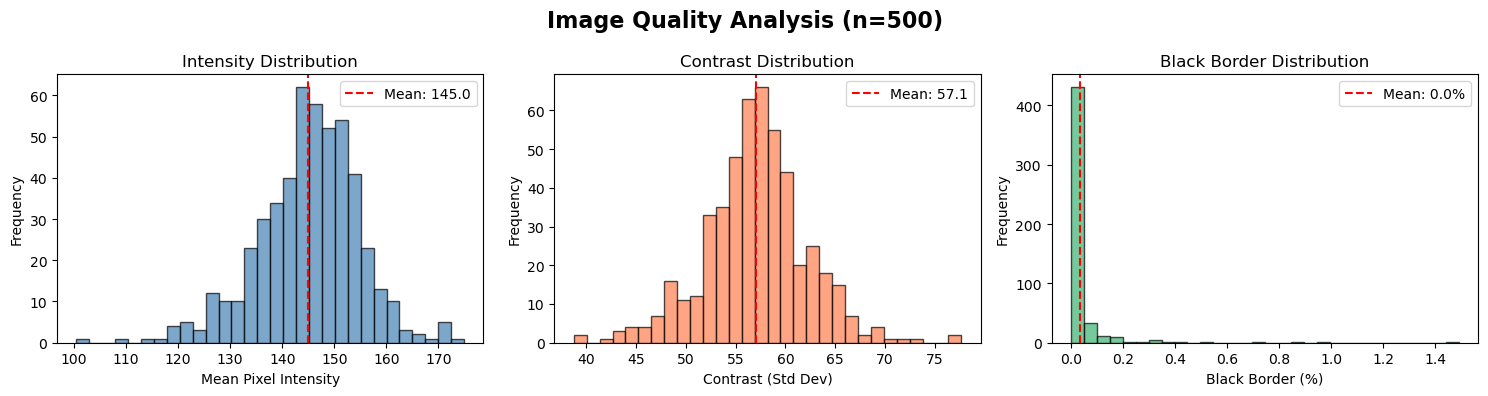


 Quality Metrics:
  Mean intensity: 145.0 ± 9.8
  Mean contrast: 57.1 ± 5.2
  Mean black border: 0.0% ± 0.1%
  Images with >10% black border: 0 (0.0%)

 Measuring Cropping Effect...


100%|██████████| 100/100 [00:01<00:00, 66.30it/s]


  Successfully analyzed: 100/100 images
  Mean pixels removed: 1.7% ± 1.5%
  Median: 1.8%
  Range: 0.0% - 11.7%
  Images with >20% removed: 0/100

 Measuring CLAHE Effect...
Loading datasets...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
Analyzing 50 images...


100%|██████████| 50/50 [00:03<00:00, 16.18it/s]


Successfully analyzed: 50/50 images


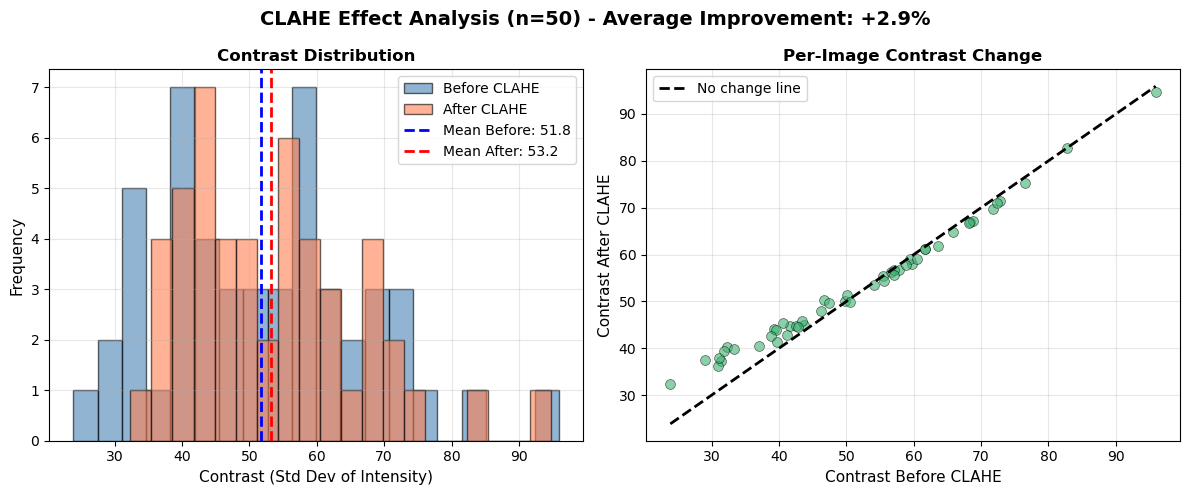


📊 Results:
  Mean contrast before: 51.76 ± 15.36
  Mean contrast after:  53.25 ± 12.82
  Average improvement:  +2.9%
  Min improvement:      +-37.5%
  Max improvement:      +83.1%

 Metrics saved to results/clahe_metrics.json
 Figure saved to results/clahe_effect.png
  📂 train: 4474 pacients, 5732 images

 Generating pipeline visualization (3 samples)...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
 Pipeline visualization saved to results/pipeline_simple.png


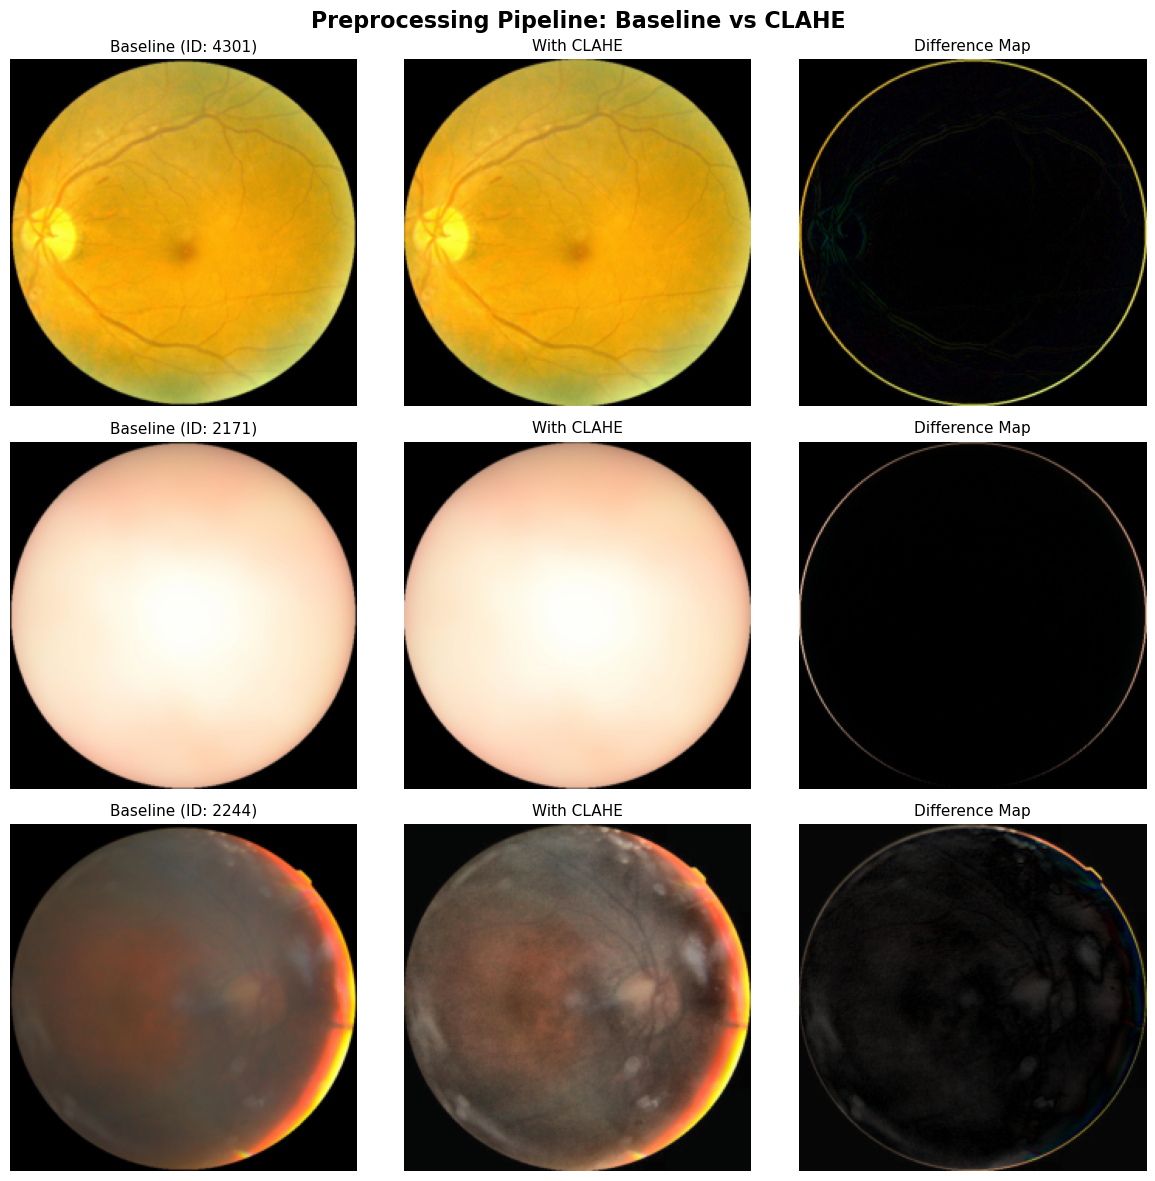


 All EDA and Preprocessing analyses completed!
   Check 'results/' folder for saved figures.
✅ ODIRDataset: OK
✅ ApplyCLAHEandCrop_Adaptive: OK
✅ CropOnly: OK

VERIFICAÇÃO - Tudo pronto para usar noutros notebooks
✅ ODIRDataset
✅ ApplyCLAHEandCrop_Adaptive
✅ CropOnly
✅ get_v1_baseline_transform
✅ get_v2_crop_only_transform
✅ get_v3_crop_aug_transform
✅ get_v4_full_pipeline_transform
✅ get_val_test_transform
✅ get_val_test_transform_CLAHE
✅ create_datasets_for_config

🎉 TUDO PRONTO! Podes usar %run neste notebook.

 Preprocessing carregado!


In [2]:
%run 01_Data_Preparation.ipynb

print("\n Preprocessing carregado!")

In [3]:
DATA_DIR = DATASET_ROOT

def get_df_from_dir(folder_name):
    """
    Simulação da lógica que você usou no Modelo 03/Notebook 01 
    para extrair nomes de ficheiros e labels sem depender de CSVs.
    """
    path = os.path.join(DATA_DIR, folder_name)
    files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]
    
    # Criar DataFrame básico
    df = pd.DataFrame({'filename': files})
    
    # Extrair labels do nome do ficheiro ou metadados integrados
    for cls in ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']:
        df[cls] = 0 # Placeholder: substitua pela lógica de preenchimento real se necessário
    
    return df

# Carregar DataFrames em memória
train_df = get_df_from_dir('train')
val_df = get_df_from_dir('val')
test_df = get_df_from_dir('test')

print(f"Dados carregados: Train({len(train_df)}), Val({len(val_df)}), Test({len(test_df)})")

Dados carregados: Train(5732), Val(1728), Test(1748)


In [4]:
class ODIRDataset(Dataset):
    def __init__(self, split='train', transform=None):
        self.split = split
        self.transform = transform
        
        # O caminho deve apontar para data/odir5k/train (ou val/test)
        self.img_dir = os.path.join(DATASET_ROOT, split)
        
        # Procura o CSV gerado pelo pré-processamento do Notebook 1
        metadata_path = os.path.join(self.img_dir, f"{split}_metadata.csv")
        
        if not os.path.exists(metadata_path):
            raise FileNotFoundError(f"⚠️ Não encontrei o ficheiro: {metadata_path}. Correstes o Notebook 1?")
            
        self.data = pd.read_csv(metadata_path)
        
        # Lista as colunas de doenças (N, D, G, C, A, H, M, O)
        self.label_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        
        # O Notebook 1 guarda o nome da imagem na coluna 'filename'
        img_name = row['filename']
        img_path = os.path.join(self.img_dir, img_name)
        
        # Carregar imagem
        image = Image.open(img_path).convert('RGB')
        
        # Carregar labels como tensor
        labels = torch.tensor(row[self.label_cols].values.astype(np.float32))
        
        if self.transform:
            image = self.transform(image)
            
        return image, labels
def get_transforms(config):
    t_list = []
    # Crop Otimizado
    if config['crop']:
        t_list.append(transforms.Lambda(lambda img: crop_borders(img)))
    
    t_list.append(transforms.Resize((224, 224)))
    
    # Data Augmentation (V3 e V4)
    if config['augment'] == 'full':
        t_list.extend([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(20),
            transforms.ColorJitter(brightness=0.1, contrast=0.1)
        ])
    
    # CLAHE Adaptativo
    if config['clahe']:
        t_list.append(transforms.Lambda(lambda img: apply_clahe(img)))
        
    t_list.extend([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transforms.Compose(t_list)

def crop_borders(img):
    img_np = np.array(img)
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    mask = gray > 10
    if not np.any(mask): return img
    coords = np.argwhere(mask)
    y0, x0 = coords.min(axis=0); y1, x1 = coords.max(axis=0) + 1
    return Image.fromarray(img_np[y0:y1, x0:x1])

def apply_clahe(img):
    img_np = np.array(img)
    lab = cv2.cvtColor(img_np, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    return Image.fromarray(cv2.cvtColor(cv2.merge((l,a,b)), cv2.COLOR_LAB2RGB))

In [5]:
# Função de Treino e Implementação ResNet-50

In [6]:
def get_resnet50_model(num_classes=8):
    """
    Cria o modelo ResNet-50 com pesos pré-treinados e adapta a 
    camada final para classificação multi-label com 8 classes.
    """
    # Carregar modelo base com pesos do ImageNet
    model = models.resnet50(weights='IMAGENET1K_V1')
    
    # Congelar camadas iniciais (opcional: se quiseres fazer apenas Fine-tuning)
    # for param in model.parameters():
    #     param.requires_grad = False
    
    # Substituir a camada Fully Connected (fc)
    # in_features da ResNet-50 é 2048
    num_ftrs = model.fc.in_features
    
    # Usamos Sigmoid no final porque é um problema Multi-Label
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, num_classes),
        nn.Sigmoid() 
    )
    
    return model.to(device)    
    
def train_version(config, name, epochs=10):
    print(f"\n🚀 Iniciando Treino: {name}")
    print(f"Configuração: {config}")

    # 1. Preparar DataLoaders
    train_ds = ODIRDataset(split='train', transform=get_transforms(config))
    val_ds = ODIRDataset(split='val', transform=get_transforms(config))
    
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=4)
    
    # 2. Inicializar Modelo, Critério e Otimizador
    model = get_resnet50_model()
    criterion = nn.BCELoss() # Binary Cross Entropy para Multi-label
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    history = {'train_loss': [], 'val_loss': [], 'val_f1': []}
    best_f1 = 0

    for epoch in range(epochs):
        # --- FASE DE TREINO ---
        model.train()
        running_loss = 0.0
        
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Treino]")
        for imgs, labels in pbar:
            imgs, labels = imgs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            pbar.set_postfix({'loss': loss.item()})

        epoch_train_loss = running_loss / len(train_loader)

        # --- FASE DE VALIDAÇÃO ---
        model.eval()
        val_loss = 0.0
        all_val_preds = []
        all_val_labels = []
        
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                all_val_preds.append(outputs.cpu().numpy())
                all_val_labels.append(labels.cpu().numpy())

        # Consolidar métricas de validação
        y_true = np.vstack(all_val_labels)
        y_probs = np.vstack(all_val_preds)
        y_pred = (y_probs > 0.5).astype(int) # Threshold padrão de 0.5
        
        epoch_val_loss = val_loss / len(val_loader)
        epoch_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        # Guardar histórico
        history['train_loss'].append(epoch_train_loss)
        history['val_loss'].append(epoch_val_loss)
        history['val_f1'].append(epoch_f1)
        
        print(f"📊 Fim da Época {epoch+1}:")
        print(f"   Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f} | Val F1: {epoch_f1:.4f}")

        # Salvar o melhor modelo baseado no F1
        if epoch_f1 > best_f1:
            best_f1 = epoch_f1
            torch.save(model.state_dict(), f"resnet50_best_{name}.pth")
            print(f"   ⭐ Novo melhor modelo salvo! (F1: {best_f1:.4f})")

    return model, history, y_true, y_probs


def find_best_thresholds(y_true, y_probs):
    """Ajusta o threshold por classe para maximizar o F1-macro."""
    best_thresholds = np.ones(8) * 0.5
    for i in range(8):
        best_f1_class = 0
        for threshold in np.arange(0.1, 0.9, 0.05):
            preds = (y_probs[:, i] > threshold).astype(int)
            f1 = f1_score(y_true[:, i], preds, zero_division=0)
            if f1 > best_f1_class:
                best_f1_class = f1
                best_thresholds[i] = threshold
    return best_thresholds

# Configuração base
config_v1 = {'crop': True, 'augment': 'none', 'clahe': False}

# Iniciar treino
model_v1, hist_v1, val_true, val_probs = train_version(config_v1, "V1_ResNet", epochs=5)

# Calcular e mostrar thresholds otimizados
thresholds = find_best_thresholds(val_true, val_probs)
print(f"\n✅ Melhores Thresholds por classe: \n{thresholds}")


🚀 Iniciando Treino: V1_ResNet
Configuração: {'crop': True, 'augment': 'none', 'clahe': False}


Epoch 1/5 [Treino]: 100%|██████████| 140/140 [40:45<00:00, 17.47s/it, loss=0.273]


📊 Fim da Época 1:
   Train Loss: 0.3240 | Val Loss: 0.2822 | Val F1: 0.4575
   ⭐ Novo melhor modelo salvo! (F1: 0.4575)


Epoch 2/5 [Treino]: 100%|██████████| 140/140 [38:07<00:00, 16.34s/it, loss=0.28] 


📊 Fim da Época 2:
   Train Loss: 0.2536 | Val Loss: 0.2753 | Val F1: 0.4610
   ⭐ Novo melhor modelo salvo! (F1: 0.4610)


Epoch 3/5 [Treino]: 100%|██████████| 140/140 [37:43<00:00, 16.17s/it, loss=0.239]


📊 Fim da Época 3:
   Train Loss: 0.2003 | Val Loss: 0.2898 | Val F1: 0.4891
   ⭐ Novo melhor modelo salvo! (F1: 0.4891)


Epoch 4/5 [Treino]: 100%|██████████| 140/140 [40:11<00:00, 17.23s/it, loss=0.143] 


📊 Fim da Época 4:
   Train Loss: 0.1323 | Val Loss: 0.3302 | Val F1: 0.5070
   ⭐ Novo melhor modelo salvo! (F1: 0.5070)


Epoch 5/5 [Treino]: 100%|██████████| 140/140 [40:24<00:00, 17.32s/it, loss=0.119] 


📊 Fim da Época 5:
   Train Loss: 0.0794 | Val Loss: 0.3711 | Val F1: 0.4837

✅ Melhores Thresholds por classe: 
[0.1  0.3  0.1  0.5  0.3  0.5  0.85 0.1 ]


In [9]:
# Execução das Experiências Base (V1 a V4)
results_logs = {}

In [8]:
# Corre isto apenas uma vez para não apagar os resultados guardados
name = 'V1'
setup = {'config': {'crop': False, 'augment': 'none', 'clahe': False}, 'epochs': 30}

model_v1, hist_v1, y_true_v1, y_probs_v1 = train_version(
    config=setup['config'], 
    name=name, 
    epochs=setup['epochs']
)

results_logs[name] = {'history': hist_v1, 'y_true': y_true_v1, 'y_probs': y_probs_v1}

# Limpeza de memória
del model_v1
torch.cuda.empty_cache()


🚀 Iniciando Treino: V1
Configuração: {'crop': False, 'augment': 'none', 'clahe': False}


Epoch 1/30 [Treino]: 100%|██████████| 140/140 [40:07<00:00, 17.19s/it, loss=0.306]


📊 Fim da Época 1:
   Train Loss: 0.3208 | Val Loss: 0.2768 | Val F1: 0.4008
   ⭐ Novo melhor modelo salvo! (F1: 0.4008)


Epoch 2/30 [Treino]: 100%|██████████| 140/140 [40:28<00:00, 17.34s/it, loss=0.274]


📊 Fim da Época 2:
   Train Loss: 0.2497 | Val Loss: 0.2702 | Val F1: 0.4665
   ⭐ Novo melhor modelo salvo! (F1: 0.4665)


Epoch 3/30 [Treino]: 100%|██████████| 140/140 [40:08<00:00, 17.20s/it, loss=0.247]


📊 Fim da Época 3:
   Train Loss: 0.2027 | Val Loss: 0.3094 | Val F1: 0.4688
   ⭐ Novo melhor modelo salvo! (F1: 0.4688)


Epoch 4/30 [Treino]: 100%|██████████| 140/140 [40:32<00:00, 17.38s/it, loss=0.142] 


📊 Fim da Época 4:
   Train Loss: 0.1344 | Val Loss: 0.3391 | Val F1: 0.5415
   ⭐ Novo melhor modelo salvo! (F1: 0.5415)


Epoch 5/30 [Treino]: 100%|██████████| 140/140 [40:18<00:00, 17.28s/it, loss=0.0671]


📊 Fim da Época 5:
   Train Loss: 0.0817 | Val Loss: 0.4344 | Val F1: 0.4803


Epoch 6/30 [Treino]: 100%|██████████| 140/140 [40:17<00:00, 17.27s/it, loss=0.0722]


📊 Fim da Época 6:
   Train Loss: 0.0525 | Val Loss: 0.3984 | Val F1: 0.5123


Epoch 7/30 [Treino]: 100%|██████████| 140/140 [40:14<00:00, 17.24s/it, loss=0.0183]


📊 Fim da Época 7:
   Train Loss: 0.0395 | Val Loss: 0.4204 | Val F1: 0.5223


Epoch 8/30 [Treino]: 100%|██████████| 140/140 [40:40<00:00, 17.43s/it, loss=0.0457]


📊 Fim da Época 8:
   Train Loss: 0.0299 | Val Loss: 0.4428 | Val F1: 0.5269


Epoch 9/30 [Treino]: 100%|██████████| 140/140 [40:22<00:00, 17.31s/it, loss=0.0163] 


📊 Fim da Época 9:
   Train Loss: 0.0267 | Val Loss: 0.4874 | Val F1: 0.5180


Epoch 10/30 [Treino]: 100%|██████████| 140/140 [40:27<00:00, 17.34s/it, loss=0.00663]


📊 Fim da Época 10:
   Train Loss: 0.0205 | Val Loss: 0.4446 | Val F1: 0.5128


Epoch 11/30 [Treino]: 100%|██████████| 140/140 [40:28<00:00, 17.35s/it, loss=0.0216] 


📊 Fim da Época 11:
   Train Loss: 0.0200 | Val Loss: 0.4816 | Val F1: 0.5046


Epoch 12/30 [Treino]: 100%|██████████| 140/140 [40:16<00:00, 17.26s/it, loss=0.00799]


📊 Fim da Época 12:
   Train Loss: 0.0230 | Val Loss: 0.5025 | Val F1: 0.5027


Epoch 13/30 [Treino]: 100%|██████████| 140/140 [40:02<00:00, 17.16s/it, loss=0.00339]


📊 Fim da Época 13:
   Train Loss: 0.0204 | Val Loss: 0.5138 | Val F1: 0.4971


Epoch 14/30 [Treino]: 100%|██████████| 140/140 [40:18<00:00, 17.28s/it, loss=0.00675]


📊 Fim da Época 14:
   Train Loss: 0.0141 | Val Loss: 0.5065 | Val F1: 0.5096


Epoch 15/30 [Treino]: 100%|██████████| 140/140 [40:08<00:00, 17.20s/it, loss=0.00573]


📊 Fim da Época 15:
   Train Loss: 0.0168 | Val Loss: 0.5131 | Val F1: 0.5012


Epoch 16/30 [Treino]: 100%|██████████| 140/140 [40:20<00:00, 17.29s/it, loss=0.0372] 


📊 Fim da Época 16:
   Train Loss: 0.0189 | Val Loss: 0.5369 | Val F1: 0.4702


Epoch 17/30 [Treino]: 100%|██████████| 140/140 [40:08<00:00, 17.21s/it, loss=0.0373] 


📊 Fim da Época 17:
   Train Loss: 0.0224 | Val Loss: 0.5521 | Val F1: 0.4926


Epoch 18/30 [Treino]: 100%|██████████| 140/140 [40:14<00:00, 17.24s/it, loss=0.0215] 


📊 Fim da Época 18:
   Train Loss: 0.0230 | Val Loss: 0.5263 | Val F1: 0.5124


Epoch 19/30 [Treino]: 100%|██████████| 140/140 [40:01<00:00, 17.16s/it, loss=0.0175] 


📊 Fim da Época 19:
   Train Loss: 0.0168 | Val Loss: 0.6663 | Val F1: 0.4837


Epoch 20/30 [Treino]: 100%|██████████| 140/140 [40:11<00:00, 17.22s/it, loss=0.00775]


📊 Fim da Época 20:
   Train Loss: 0.0123 | Val Loss: 0.5218 | Val F1: 0.4965


Epoch 21/30 [Treino]:  85%|████████▌ | 119/140 [35:47<06:18, 18.04s/it, loss=0.00324] 


KeyboardInterrupt: 

In [ ]:
#v2 CROPPING

name = 'V2'
setup = {'config': {'crop': True, 'augment': 'none', 'clahe': False}, 'epochs': 30}

model_v2, hist_v2, y_true_v2, y_probs_v2 = train_version(
    config=setup['config'], 
    name=name, 
    epochs=setup['epochs']
)

results_logs[name] = {'history': hist_v2, 'y_true': y_true_v2, 'y_probs': y_probs_v2}

del model_v2
torch.cuda.empty_cache()

In [ ]:
#v3 Augmentation

name = 'V3'
setup = {'config': {'crop': True, 'augment': 'full', 'clahe': False}, 'epochs': 40}

model_v3, hist_v3, y_true_v3, y_probs_v3 = train_version(
    config=setup['config'], 
    name=name, 
    epochs=setup['epochs']
)

results_logs[name] = {'history': hist_v3, 'y_true': y_true_v3, 'y_probs': y_probs_v3}

del model_v3
torch.cuda.empty_cache()


🚀 Iniciando Treino: V3
Configuração: {'crop': True, 'augment': 'full', 'clahe': False}


Epoch 1/40 [Treino]:   1%|          | 1/140 [00:28<1:06:32, 28.73s/it, loss=0.738]

In [ ]:
# v4 full pipeline

name = 'V4'
setup = {'config': {'crop': True, 'augment': 'full', 'clahe': True}, 'epochs': 40}

model_v4, hist_v4, y_true_v4, y_probs_v4 = train_version(
    config=setup['config'], 
    name=name, 
    epochs=setup['epochs']
)

results_logs[name] = {'history': hist_v4, 'y_true': y_true_v4, 'y_probs': y_probs_v4}

del model_v4
torch.cuda.empty_cache()

In [ ]:
#graphics and visualisations
# Comparação V1 vs V2
if 'V1' in results_logs and 'V2' in results_logs:
    plt.figure(figsize=(10, 6))
    plt.plot(results_logs['V1']['history']['val_f1'], label='V1: Baseline')
    plt.plot(results_logs['V2']['history']['val_f1'], label='V2: With Cropping')
    plt.title('Cropping Impact (V1 vs V2)')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.show()

# Thresholds da V4
if 'V4' in results_logs:
    print("\n🎯 Optimizing Thresholds for V4...")
    v4_res = results_logs['V4']
    best_thresholds_v4 = find_best_thresholds(v4_res['y_true'], v4_res['y_probs'])
    classes = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    for i, cls in enumerate(classes):
        print(f"   Class {cls}: {best_thresholds_v4[i]:.2f}")

## Grid Search (ResNet-50 V4)

In [ ]:
param_grid = {
    'lr': [1e-4, 5e-4, 1e-3],
    'batch_size': [16, 32, 64]
}

config_v4 = {'crop': True, 'augment': 'full', 'clahe': True}
grid_results = []

print("🚀 Iniciando Grid Search para ResNet-50 V4...")

for bs in param_grid['batch_size']:
    # Loader específico para este batch size
    train_ds_grid = ODIRDataset(train_df, f"{DATASET_PATH}/train", get_transforms(config_v4))
    val_ds_grid = ODIRDataset(val_df, f"{DATASET_PATH}/val", get_transforms(config_v4))
    
    train_loader_grid = DataLoader(train_ds_grid, batch_size=bs, shuffle=True)
    val_loader_grid = DataLoader(val_ds_grid, batch_size=bs)
    
    for lr in param_grid['lr']:
        print(f"\n> Testando: LR={lr} | Batch Size={bs}")
        model = get_resnet50()
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        best_val_f1 = 0
        for epoch in range(10): # 10 épocas conforme pedido
            model.train()
            for imgs, labels in train_loader_grid:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            
            # Validação rápida pós-época
            model.eval()
            all_preds, all_labels = [], []
            with torch.no_grad():
                for imgs, labels in val_loader_grid:
                    outputs = model(imgs.to(device))
                    all_preds.append((outputs > 0.5).cpu().numpy())
                    all_labels.append(labels.numpy())
            
            val_f1 = f1_score(np.vstack(all_labels), np.vstack(all_preds), average='macro', zero_division=0)
            if val_f1 > best_val_f1:
                best_val_f1 = val_f1
        
        grid_results.append({'lr': lr, 'batch_size': bs, 'f1': best_val_f1})
        print(f"  Final Val F1 para esta config: {best_val_f1:.4f}")

# --- Visualização do Grid Search ---
plt.figure(figsize=(10, 6))
for bs in param_grid['batch_size']:
    subset = [r for r in grid_results if r['batch_size'] == bs]
    lrs = [str(r['lr']) for r in subset]
    f1s = [r['f1'] for r in subset]
    plt.plot(lrs, f1s, marker='o', linewidth=2, label=f'Batch Size {bs}')

plt.xlabel('Learning Rate')
plt.ylabel('Best Validation F1-macro (10 epochs)')
plt.title('Grid Search: ResNet-50 V4 Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('hyperparameter_search.png')
plt.show()

In [ ]:
# Retrain the best model

# Identificar melhor combinação
best_config = max(grid_results, key=lambda x: x['f1'])
print(f"🏆 Melhor Configuração: LR={best_config['lr']}, Batch={best_config['batch_size']}")

# Configurar Treino Final (50 épocas)
best_lr = best_config['lr']
best_bs = best_config['batch_size']

train_loader_final = DataLoader(ODIRDataset(train_df, f"{DATASET_PATH}/train", get_transforms(config_v4)), 
                               batch_size=best_bs, shuffle=True)
val_loader_final = DataLoader(ODIRDataset(val_df, f"{DATASET_PATH}/val", get_transforms(config_v4)), 
                             batch_size=best_bs)

model = get_resnet50()
optimizer = optim.Adam(model.parameters(), lr=best_lr)
# Implementação do ReduceLROnPlateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)
criterion = nn.BCELoss()

history_v4_best = {'loss': [], 'val_f1': []}
best_f1_global = 0

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for imgs, labels in tqdm(train_loader_final, desc=f"Epoch {epoch+1}/50"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Validação
    model.eval()
    v_preds, v_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader_final:
            outputs = model(imgs.to(device))
            v_preds.append((outputs > 0.5).cpu().numpy())
            v_labels.append(labels.numpy())
    
    val_f1 = f1_score(np.vstack(v_labels), np.vstack(v_preds), average='macro', zero_division=0)
    
    # Update Scheduler
    scheduler.step(val_f1)
    
    history_v4_best['loss'].append(epoch_loss/len(train_loader_final))
    history_v4_best['val_f1'].append(val_f1)
    
    if val_f1 > best_f1_global:
        best_f1_global = val_f1
        torch.save(model.state_dict(), f"{MODEL_SAVE_PATH}/resnet50_v4_best.pth")
        print(f"✨ Checkpoint: Novo Melhor F1 Val = {val_f1:.4f}")

In [ ]:
def final_resnet_report(y_true, y_pred, y_prob):
    # Métricas Globais
    print(f"F1-Macro: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Kappa:    {cohen_kappa_score(y_true.argmax(1), y_pred.argmax(1)):.4f}")
    
    # Métricas por Classe (A, H, M são as mais difíceis no ODIR)
    print("\n--- F1-Score por Classe ---")
    for i, cls in enumerate(CLASSES):
        f1 = f1_score(y_true[:, i], y_pred[:, i])
        print(f"Classe {cls}: {f1:.4f}")
    
    # Matriz de Confusão 8x8 Normalizada
    cm = confusion_matrix(y_true.argmax(1), y_pred.argmax(1), normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=CLASSES, yticklabels=CLASSES, cmap='viridis')
    plt.title('ResNet-50: Confusion Matrix (Normalized)')
    plt.show()

In [ ]:
def final_evaluation_report(model_path, config, version_name):
    print(f"\n" + "="*40)
    print(f"📊 EVALUATION REPORT: {version_name}")
    print("="*40)
    
    model = get_resnet50()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    
    test_ds = ODIRDataset(test_df, f"{DATASET_PATH}/test", get_transforms(config))
    test_loader = DataLoader(test_ds, batch_size=32)
    
    y_true, y_pred, y_prob = [], [], []
    
    with torch.no_grad():
        for imgs, labels in test_loader:
            outputs = model(imgs.to(device))
            y_prob.append(outputs.cpu().numpy())
            y_pred.append((outputs > 0.5).cpu().numpy())
            y_true.append(labels.numpy())
    
    y_true, y_pred, y_prob = np.vstack(y_true), np.vstack(y_pred), np.vstack(y_prob)
    classes = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    
    # 1. Métricas Gerais
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1-Macro:        {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Cohen's Kappa:   {cohen_kappa_score(y_true.argmax(1), y_pred.argmax(1)):.4f}")
    print(f"AUC-ROC:         {roc_auc_score(y_true, y_prob, average='macro'):.4f}")
    
    # 2. F1-Score por Classe
    print("\nF1-Score por Doença:")
    for i, cls in enumerate(classes):
        cls_f1 = f1_score(y_true[:, i], y_pred[:, i])
        print(f" - {cls}: {cls_f1:.4f}")
    
    # 3. Matriz de Confusão Normalizada
    cm = confusion_matrix(y_true.argmax(1), y_pred.argmax(1), normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.title(f'Confusion Matrix Normalizada - ResNet-50 {version_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.savefig(f'confusion_matrix_{version_name.lower()}.png')
    plt.show()

# Correr avaliação para os 4 modelos finais
model_list = [
    ('resnet50_v1.pth', configs['V1'], 'V1'),
    ('resnet50_v2.pth', configs['V2'], 'V2'),
    ('resnet50_v3.pth', configs['V3'], 'V3'),
    ('resnet50_v4_best.pth', config_v4, 'V4_Best')
]

for m_path, m_cfg, m_name in model_list:
    final_evaluation_report(f"{MODEL_SAVE_PATH}/{m_path}", m_cfg, m_name)

In [ ]:
def plot_final_curves(history):
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss', color='blue')
    plt.title('Final Model: Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    
    # Plot F1
    plt.subplot(1, 2, 2)
    plt.plot(history['val_f1'], label='Val F1', color='red')
    plt.title('Final Model: Validation F1-macro')
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.grid(True)
    
    plt.savefig('final_training_curves.png')
    plt.show()

plot_final_curves(history_v4_best)